In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
data_set = pd.read_excel('data.xlsx')

In [135]:
data_set.head()

,Country,Commodity,Item,Unit,Year,Amount
0,Algeria,Total Grains/Cereals,Area Harvested,1000 Ha,1980,3181.38000
1,Algeria,Total Grains/Cereals,Yield,MT / Ha,1980,0.76026
2,Algeria,Total Grains/Cereals,Production Quantity,1000 MT,1980,2418.67440
3,Algeria,Economic Data,"Gross Domestic Product, constant prices",Percent change,1980,-5.40000
4,Algeria,Economic Data,GDP (constant 2005 US$),Million,1980,50817.86555


In [136]:
df= data_set[data_set['Country']== 'Nigeria']

In [137]:
df.head()

,Country,Commodity,Item,Unit,Year,Amount
44903,Nigeria,Total Grains/Cereals,Area Harvested,1000 Ha,1980,7165.000000
44904,Nigeria,Total Grains/Cereals,Yield,MT / Ha,1980,1.036292
44905,Nigeria,Total Grains/Cereals,Production Quantity,1000 MT,1980,7425.030000
44906,Nigeria,Economic Data,"Gross Domestic Product, constant prices",Percent change,1980,2.872000
44907,Nigeria,Economic Data,GDP (constant 2005 US$),Million,1980,57031.887210


In [138]:
df.shape

(1246, 6)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 44903 to 46148
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    1246 non-null   object 
 1   Commodity  1246 non-null   object 
 2   Item       1246 non-null   object 
 3   Unit       1246 non-null   object 
 4   Year       1246 non-null   int64  
 5   Amount     1246 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 68.1+ KB


In [140]:
df.isnull().any().sum()

0

In [141]:
df['Commodity'].unique()

array(['Total Grains/Cereals', 'Economic Data', 'Population',
       'Root Crops (R&T)', 'Total Grains/Cereals and Root Crops (R&T)',
       'Other', 'Food Aid'], dtype=object)

In [142]:
df['Item'].unique()

array(['Area Harvested', 'Yield', 'Production Quantity',
       'Gross Domestic Product, constant prices',
       'GDP (constant 2005 US$)',
       'Imports of goods and services (constant 2005 US$)',
       'Exports of goods and services (constant 2005 US$)',
       'WB GDP (constant 2005 US$) / FAO population', 'Import Quantity',
       'Import Value', 'Import Unit Value', 'Export Quantity',
       'Stock Variation', 'Feed + Seed',
       'Waste + Processed + OtherUtilization', 'Food Availability',
       'Food Availability per capita', 'Total Population - Both Sexes',
       'FAO Conversion Rate for Root Crops from MT to Grain Equiv. MT',
       'Waste + Processed + OtherUtilization - Stock Variation',
       'Food Supply', 'Cereal Food Aid', 'Total', 'Non-Cereal Food Aid'],
      dtype=object)

In [143]:
crop_data = df[df["Commodity"].str.contains("Root Crops") | df["Commodity"].str.contains("Total Grains/Cereals")]

In [144]:
crop_data.head(20)

,Country,Commodity,Item,Unit,Year,Amount
44903,Nigeria,Total Grains/Cereals,Area Harvested,1000 Ha,1980,7165.000000
44904,Nigeria,Total Grains/Cereals,Yield,MT / Ha,1980,1.036292
44905,Nigeria,Total Grains/Cereals,Production Quantity,1000 MT,1980,7425.030000
44911,Nigeria,Total Grains/Cereals,Import Quantity,1000 MT,1980,1827.600000
44912,Nigeria,Total Grains/Cereals,Import Value,Million US$,1980,593.850000
44913,Nigeria,Total Grains/Cereals,Import Unit Value,US$ / MT,1980,324.934340
44914,Nigeria,Total Grains/Cereals,Export Quantity,1000 MT,1980,0.000000
44915,Nigeria,Total Grains/Cereals,Stock Variation,1000 MT,1980,12.857000
44916,Nigeria,Total Grains/Cereals,Feed + Seed,1000 MT,1980,1258.374000
44917,Nigeria,Total Grains/Cereals,Waste + Processed + OtherUtilization,1000 MT,1980,1100.286000


In [145]:
crop_data.tail(7)

,Country,Commodity,Item,Unit,Year,Amount
46139,Nigeria,Total Grains/Cereals,Food Availability per capita,kg/cap/yr,2013,115.960392
46141,Nigeria,Root Crops (R&T),FAO Conversion Rate for Root Crops from MT to ...,Conversion Rate,2013,0.292034
46142,Nigeria,Root Crops (R&T),Food Availability,Grain Equiv. 1000 MT,2013,0.000000
46143,Nigeria,Root Crops (R&T),Food Availability per capita,kg/cap/yr,2013,103.576836
46144,Nigeria,Total Grains/Cereals and Root Crops (R&T),Production Quantity,Grain Equiv. 1000 MT,2013,21313.000000
46145,Nigeria,Total Grains/Cereals and Root Crops (R&T),Food Availability per capita,kg/cap/yr,2013,219.537228
46146,Nigeria,Total Grains/Cereals and Root Crops (R&T),Food Supply,Grain Equiv. 1000 MT,2013,28233.000000


In [146]:
Yield = crop_data[crop_data['Item']== 'Yield']

In [147]:
Yield.head()

,Country,Commodity,Item,Unit,Year,Amount
44904,Nigeria,Total Grains/Cereals,Yield,MT / Ha,1980,1.036292
44923,Nigeria,Root Crops (R&T),Yield,MT / Ha,1980,2.640726
44939,Nigeria,Total Grains/Cereals,Yield,MT / Ha,1981,1.570510
44958,Nigeria,Root Crops (R&T),Yield,MT / Ha,1981,2.036002
44974,Nigeria,Total Grains/Cereals,Yield,MT / Ha,1982,1.552594


In [148]:
crop_data[crop_data['Item']== 'Yield'].describe(include = [float])

,Amount
count,66.000000
mean,1.897042
std,0.828786
min,0.816755
25%,1.092506
50%,1.789180
75%,2.731821
max,3.362137


In [149]:
Total_population = df[df['Commodity']== 'Population']

In [150]:
Total_population.head()

,Country,Commodity,Item,Unit,Year,Amount
44920,Nigeria,Population,Total Population - Both Sexes,Million,1980,75.543
44955,Nigeria,Population,Total Population - Both Sexes,Million,1981,77.604
44990,Nigeria,Population,Total Population - Both Sexes,Million,1982,79.624
45025,Nigeria,Population,Total Population - Both Sexes,Million,1983,81.636
45060,Nigeria,Population,Total Population - Both Sexes,Million,1984,83.692


In [151]:
Total_population.describe(include = [float])

,Amount
count,34.000000
mean,117.136265
std,28.367711
min,75.543000
25%,93.331500
50%,113.943500
75%,138.967000
max,170.901000


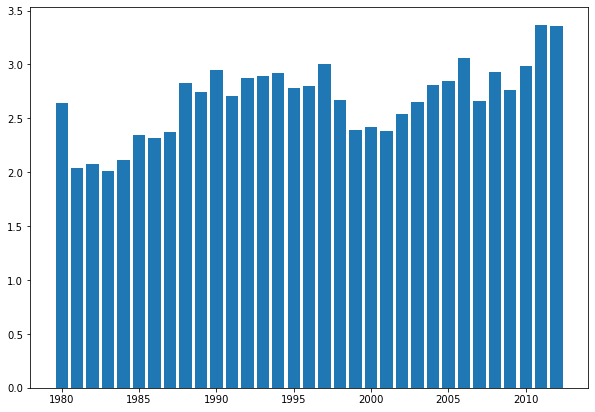

In [152]:
x = Yield['Year']
y = Yield['Amount']
fig = plt.figure(figsize =(10,7))
plt.bar(x, y)
plt.show()

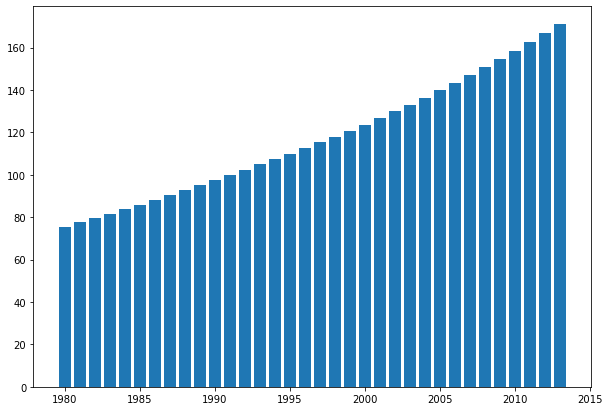

In [153]:
x = Total_population['Year']
y = Total_population['Amount']
fig = plt.figure(figsize =(10,7))
plt.bar(x, y)
plt.show()

In [154]:
Economics = df[df["Commodity"].str.contains("Economic Data")]

In [155]:
Economics.head()

,Country,Commodity,Item,Unit,Year,Amount
44906,Nigeria,Economic Data,"Gross Domestic Product, constant prices",Percent change,1980,2.872000
44907,Nigeria,Economic Data,GDP (constant 2005 US$),Million,1980,57031.887210
44908,Nigeria,Economic Data,Imports of goods and services (constant 2005 US$),Million,1980,10947.920830
44909,Nigeria,Economic Data,Exports of goods and services (constant 2005 US$),Million,1980,16753.216370
44910,Nigeria,Economic Data,WB GDP (constant 2005 US$) / FAO population,$/Person,1980,754.959258


In [156]:
GDP = Economics[Economics['Item']== 'GDP (constant 2005 US$)']

In [157]:
GDP.head()

,Country,Commodity,Item,Unit,Year,Amount
44907,Nigeria,Economic Data,GDP (constant 2005 US$),Million,1980,57031.88721
44942,Nigeria,Economic Data,GDP (constant 2005 US$),Million,1981,49544.80922
44977,Nigeria,Economic Data,GDP (constant 2005 US$),Million,1982,49428.52987
45012,Nigeria,Economic Data,GDP (constant 2005 US$),Million,1983,46811.54405
45047,Nigeria,Economic Data,GDP (constant 2005 US$),Million,1984,44556.00488


In [158]:
GDP.describe(include = [float])

,Amount
count,33.000000
mean,85698.565307
std,37332.423357
min,44556.004880
25%,57031.887210
50%,74786.680510
75%,106497.461700
max,177803.442200


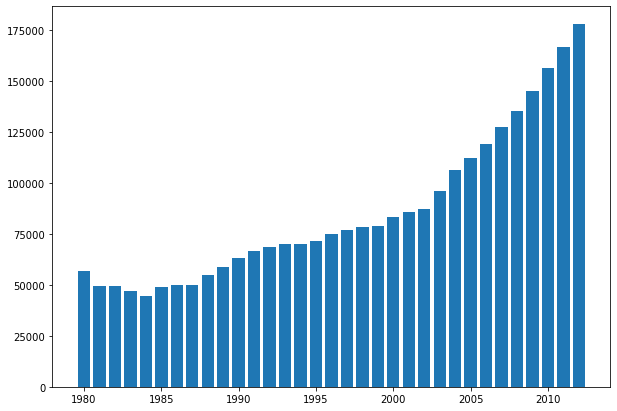

In [159]:
x = GDP['Year']
y = GDP['Amount']
fig = plt.figure(figsize =(10,7))
plt.bar(x, y)
plt.show()

In [160]:
Food_availability_both = crop_data[crop_data['Item']== 'Food Availability']

In [161]:
Food_availability = Food_availability_both[Food_availability_both['Unit']== '1000 MT']

In [162]:
Food_availability.head()

,Country,Commodity,Item,Unit,Year,Amount
44918,Nigeria,Total Grains/Cereals,Food Availability,1000 MT,1980,7084.251
44953,Nigeria,Total Grains/Cereals,Food Availability,1000 MT,1981,7579.453
44988,Nigeria,Total Grains/Cereals,Food Availability,1000 MT,1982,7692.636
45023,Nigeria,Total Grains/Cereals,Food Availability,1000 MT,1983,7335.107
45058,Nigeria,Total Grains/Cereals,Food Availability,1000 MT,1984,8524.863


In [163]:
Food_availability.describe(include = [float])

,Amount
count,34.000000
mean,14902.998118
std,4014.450405
min,7084.251000
25%,11310.832750
50%,16492.769500
75%,18223.297750
max,19817.747000


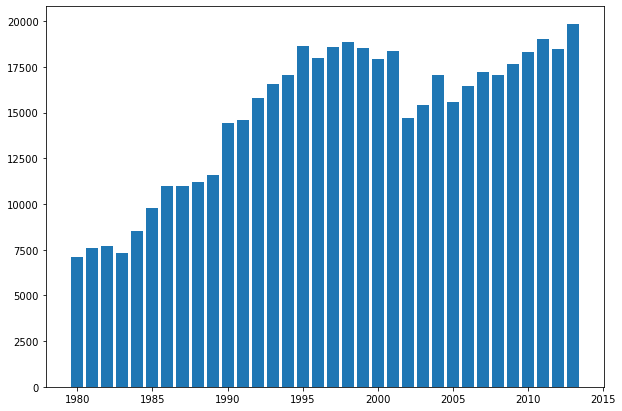

In [164]:
x = Food_availability['Year']
y = Food_availability['Amount']
fig = plt.figure(figsize =(10,7))
plt.bar(x, y)
plt.show()

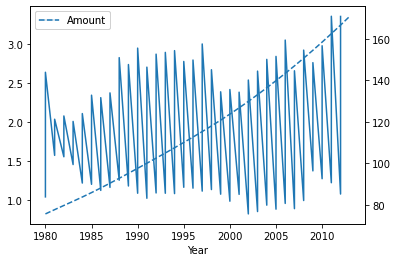

In [165]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
Yield.plot(x="Year", y=["Amount"], ax=ax)
Total_population.plot(x="Year", y=["Amount"],ax=ax2, ls="--")
#plt.bar(x, y)
plt.show()

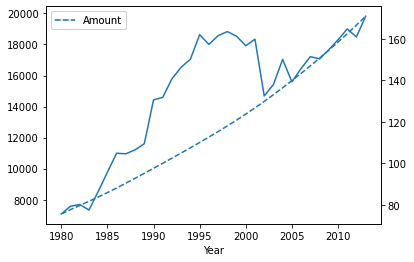

In [169]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
Food_availability.plot(x="Year", y=["Amount"], ax=ax)
Total_population.plot(x="Year", y=["Amount"],ax=ax2, ls="--")
#plt.bar(x, y)
plt.show()

<AxesSubplot:>

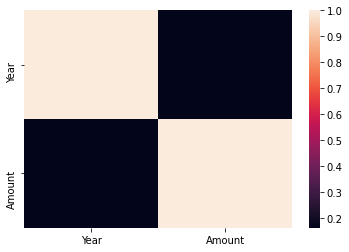

In [64]:
sns.heatmap(df.corr())